In [11]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


plt.style.use("publication")

In [25]:
df = pd.read_csv("benzene_n2_8-18GHz.txt", delimiter="\t")
peaks = pd.read_csv("6000.csv")

/tmp/ipykernel_15690/4062022921.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig("../assets/benzene-no-annotation.svg", dpi=150, transparent=True)
/home/kinlongk/miniconda3/envs/analysis/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


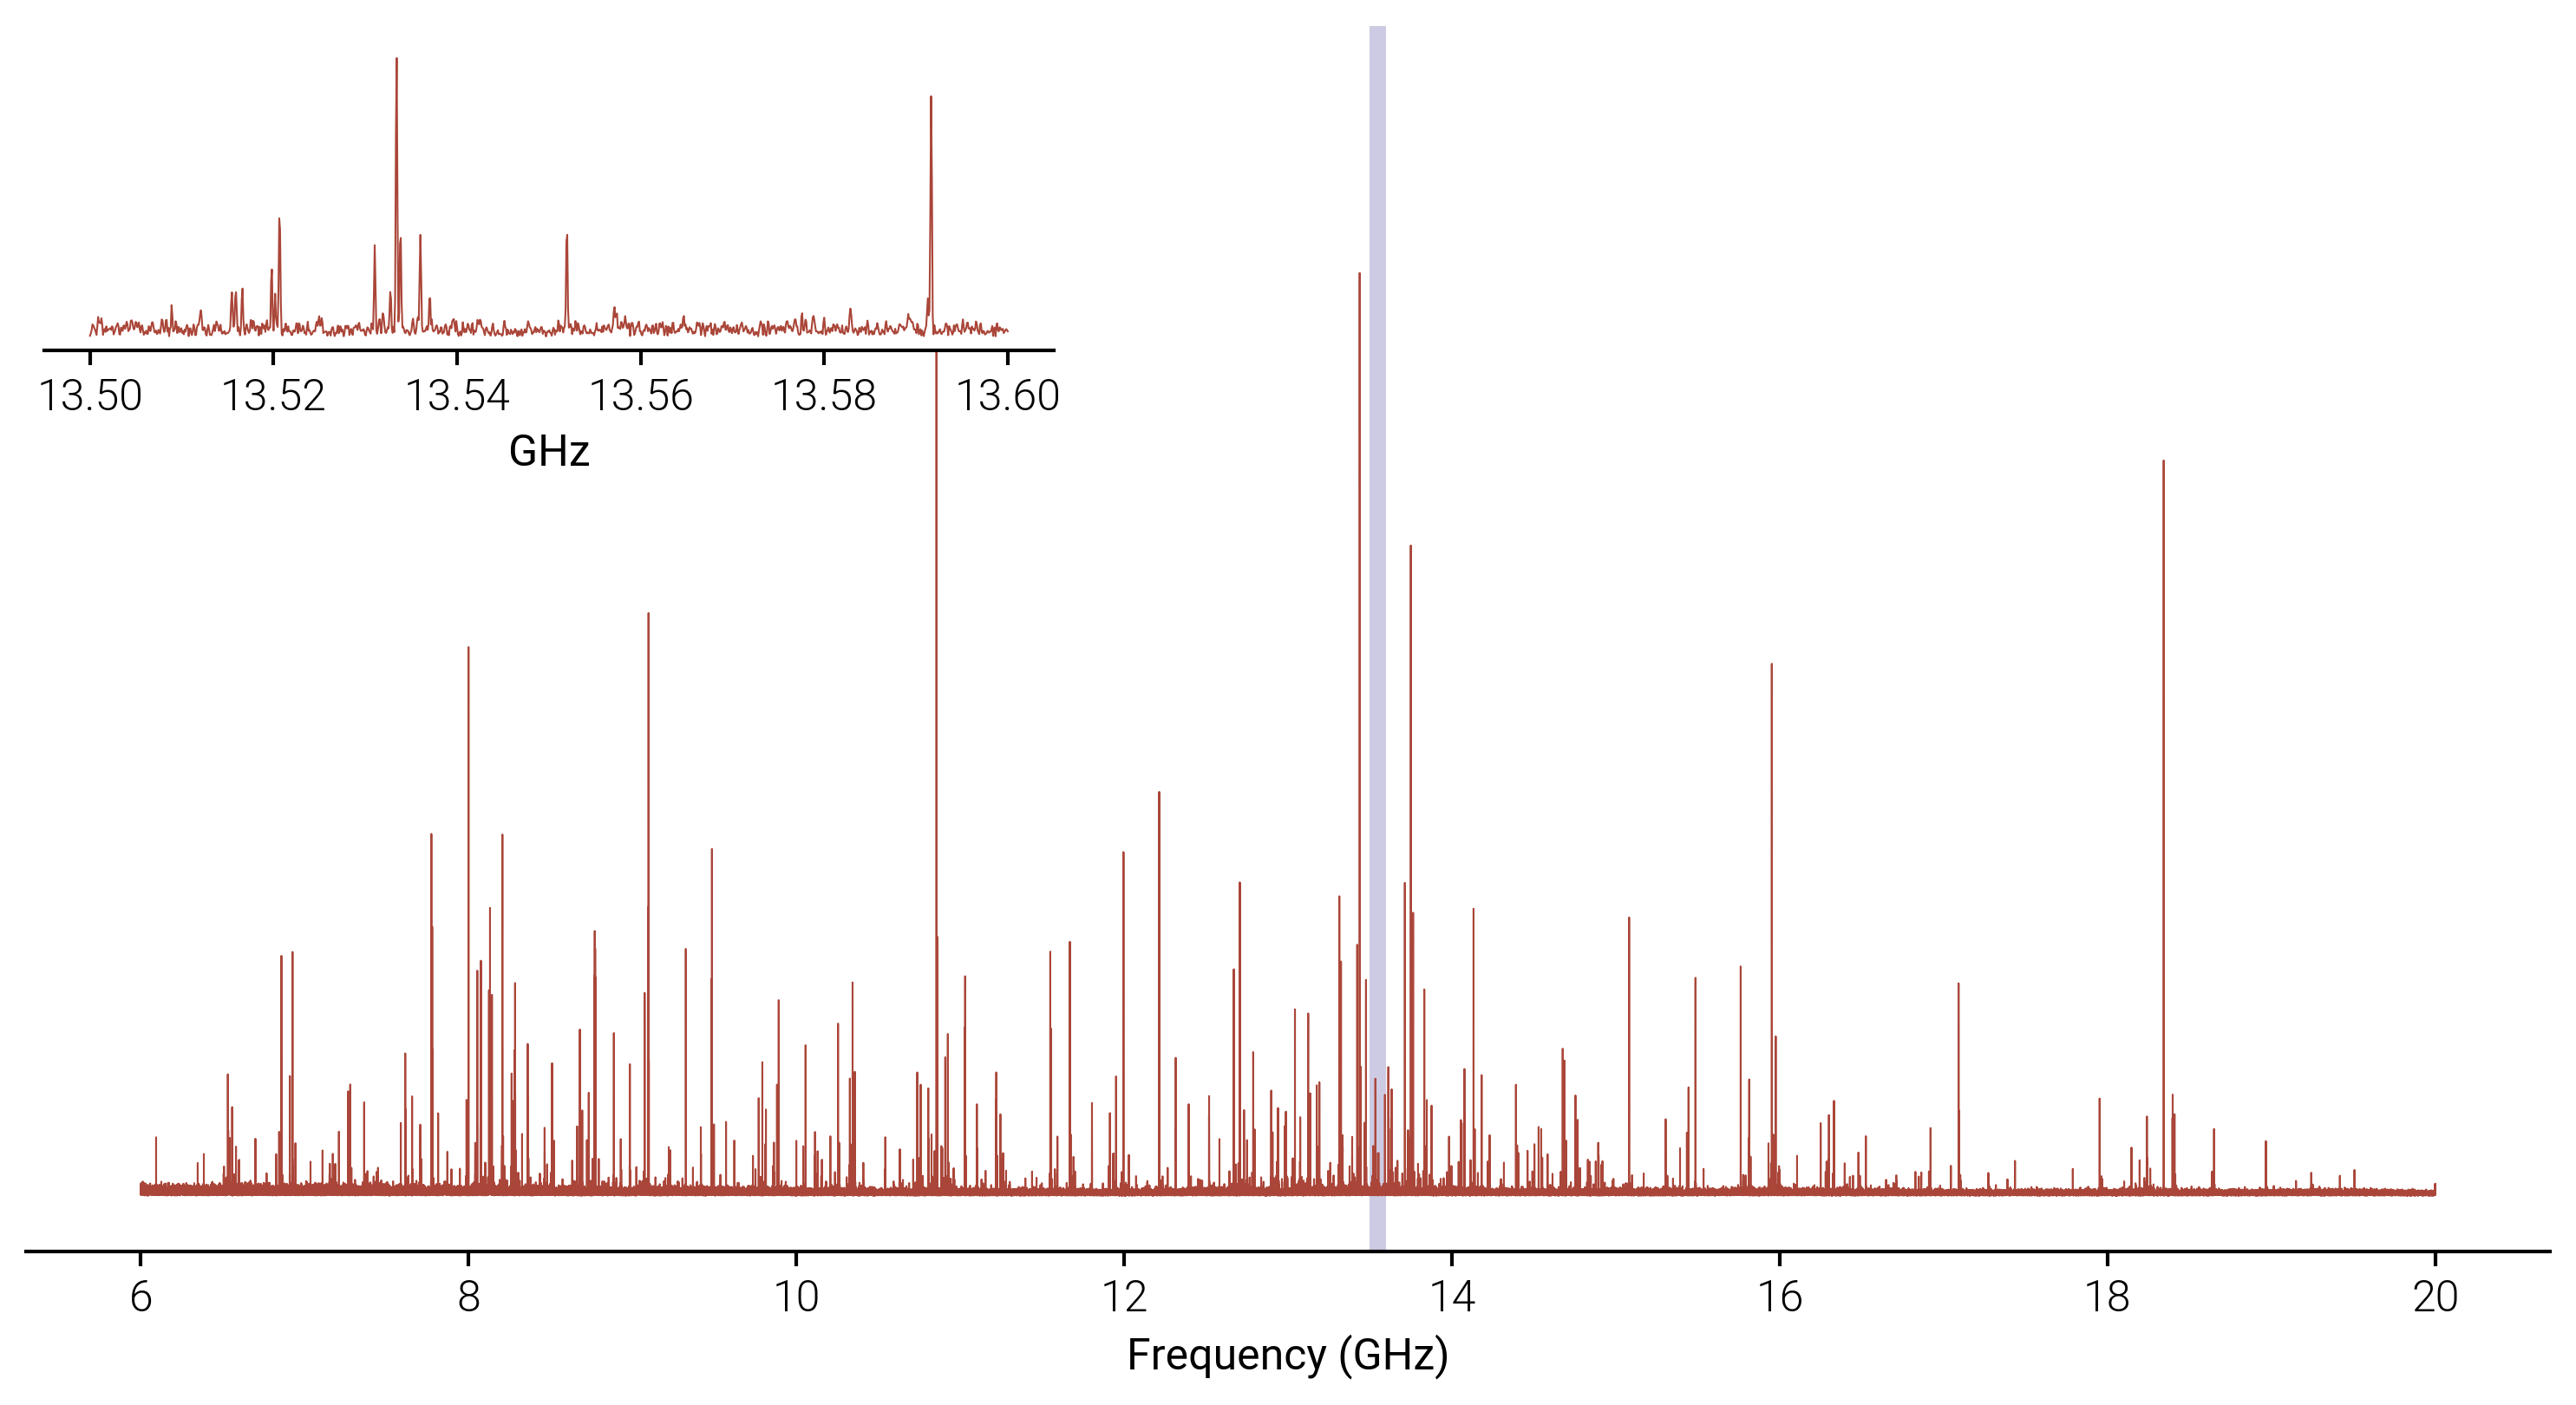

In [24]:
fig, ax = plt.subplots(figsize=(10, 5.5))

ax.plot(
    df["freq2768"] / 1000, df["ft2768"], lw=0.5
)
ax.axvspan(13.500, 13.600, 0., 1., alpha=0.3, color="#5b53a3", lw=0.)
ax.set(xlabel="Frequency (GHz)", yticks=[])
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

inset = inset_axes(ax, width="40%", height="25%", loc=2)

subset = df.loc[df["freq2768"].between(13500., 13600.)]
inset.plot(
    subset["freq2768"] / 1000, subset["ft2768"], lw=0.5
)
inset.set(yticks=[], xlabel="GHz")
for spine in inset.spines:
    if spine != "bottom":
        inset.spines[spine].set_visible(False)

fig.savefig("../assets/benzene-no-annotation.svg", dpi=150, transparent=True)

In [28]:
peaks

,name,smiles,formula,frequency,catalog_frequency,catalog_intensity,deviation,intensity,uncertainty,S,...,lstate_energy,interference,weighting,source,public,velocity,discharge,magnet,multiple,final
0,Artifact,NaN,NaN,6093.750000,6093.75000,0.0000,1.961671e-07,24.551075,0.0000,0.0,...,0.0000,False,0.0,Artifact,False,0.0,False,False,[],True
1,Artifact,NaN,NaN,6347.662289,6347.65625,0.0000,-6.038930e-03,14.454266,0.0000,0.0,...,0.0000,False,0.0,Artifact,False,0.0,False,False,[],True
2,"buta-1,3-diynylbenzene",NaN,c10h6,6385.059924,6385.07560,-3.2572,1.567603e-02,18.513337,0.0004,0.0,...,0.7037,False,0.0,Catalog,True,0.0,False,False,[],True
3,"2-ethynylcyclopenta-1,3-diene",NaN,c7h6,6505.788343,6505.82580,-3.2690,3.745672e-02,8.573330,0.0004,0.0,...,0.3271,False,0.0,Catalog,True,0.0,False,False,[],True
4,3-phenylprop-2-ynenitrile,NaN,c9h5n,6507.874040,6507.97310,-2.2965,9.906019e-02,11.297884,0.0004,0.0,...,0.5434,False,0.0,Catalog,True,0.0,False,False,[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,"cyclohexa-2,4-dien-1-one",NaN,c6h6o,19252.089630,19252.25880,-1.1107,1.691704e-01,7.524850,0.0008,0.0,...,1.0813,False,0.0,Catalog,True,0.0,False,False,[],True
770,"cyclohexa-2,4-dien-1-one",NaN,c6h6o,19292.646380,19292.57450,-3.0634,-7.188030e-02,6.131557,0.0006,0.0,...,1.4291,False,0.0,Catalog,True,0.0,False,False,[],True
771,"cyclohexa-2,4-dien-1-one",NaN,c6h6o,19418.065165,19418.06310,-1.2630,-2.065176e-03,13.612958,0.0009,0.0,...,1.3202,False,0.0,Catalog,True,0.0,False,False,[],True
772,but-3-enenitrile (cis),NaN,c4h5n,19507.138474,19507.18330,-1.2451,4.482623e-02,18.266895,0.0006,0.0,...,0.6578,False,0.0,Catalog,True,0.0,False,False,[],True


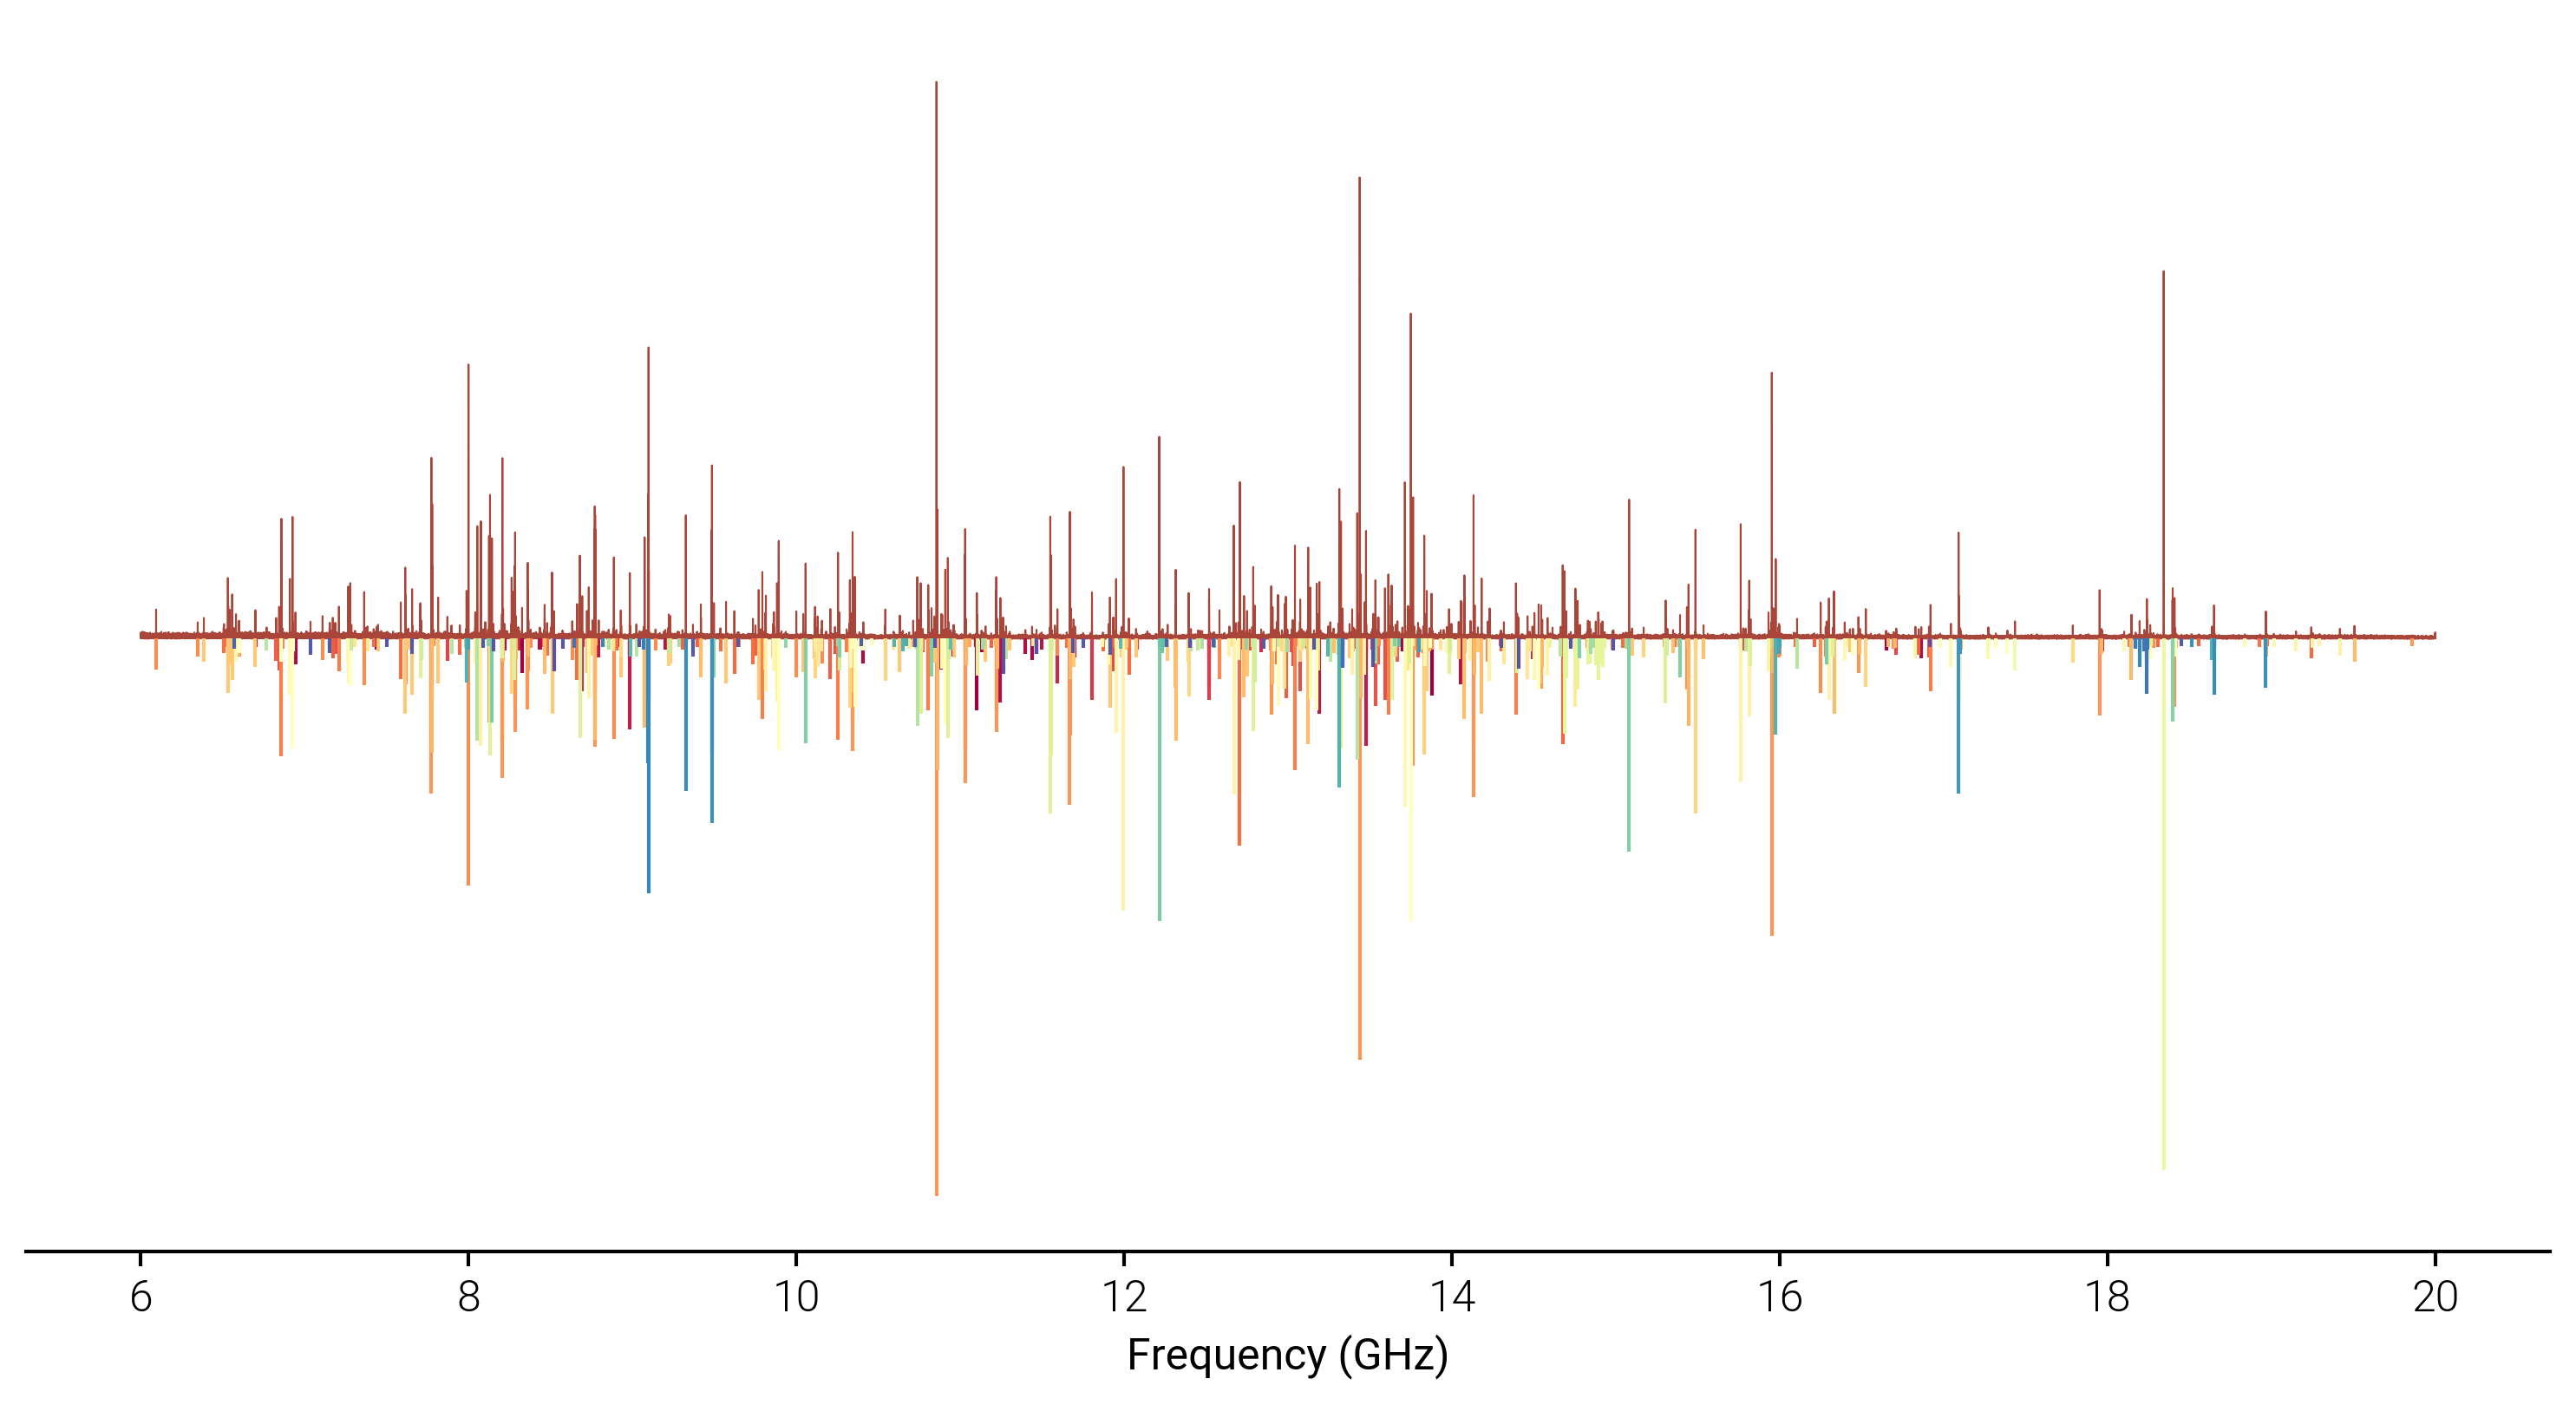

In [42]:
fig, ax = plt.subplots(figsize=(10, 5.5))

ax.plot(
    df["freq2768"] / 1000, df["ft2768"] / df["ft2768"].max(), lw=0.5
)

groups = peaks["name"].unique()
num_groups = len(groups)
colors = plt.get_cmap("Spectral")(np.linspace(0., 1., num_groups))

for index, group in enumerate(peaks.groupby("name")):
    _, subdf = group
    ax.vlines(subdf["frequency"] / 1000., -(subdf["intensity"] / peaks["intensity"].max()), 0., colors=colors[index])

ax.set(xlabel="Frequency (GHz)", yticks=[])
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

fig.savefig("../assets/benzene-annotation.svg", dpi=150, transparent=True)

In [54]:
acet = pd.read_csv("acetaldehyde-300k.csv", skiprows=1)

acet = acet.loc[acet["Position"] < 200e4]

In [77]:
levels = []
for index, row in acet.iterrows():
    labels = tuple(row[['J"', 'Sym"', '#"']].values)
    if labels not in levels:
        levels.append(labels)

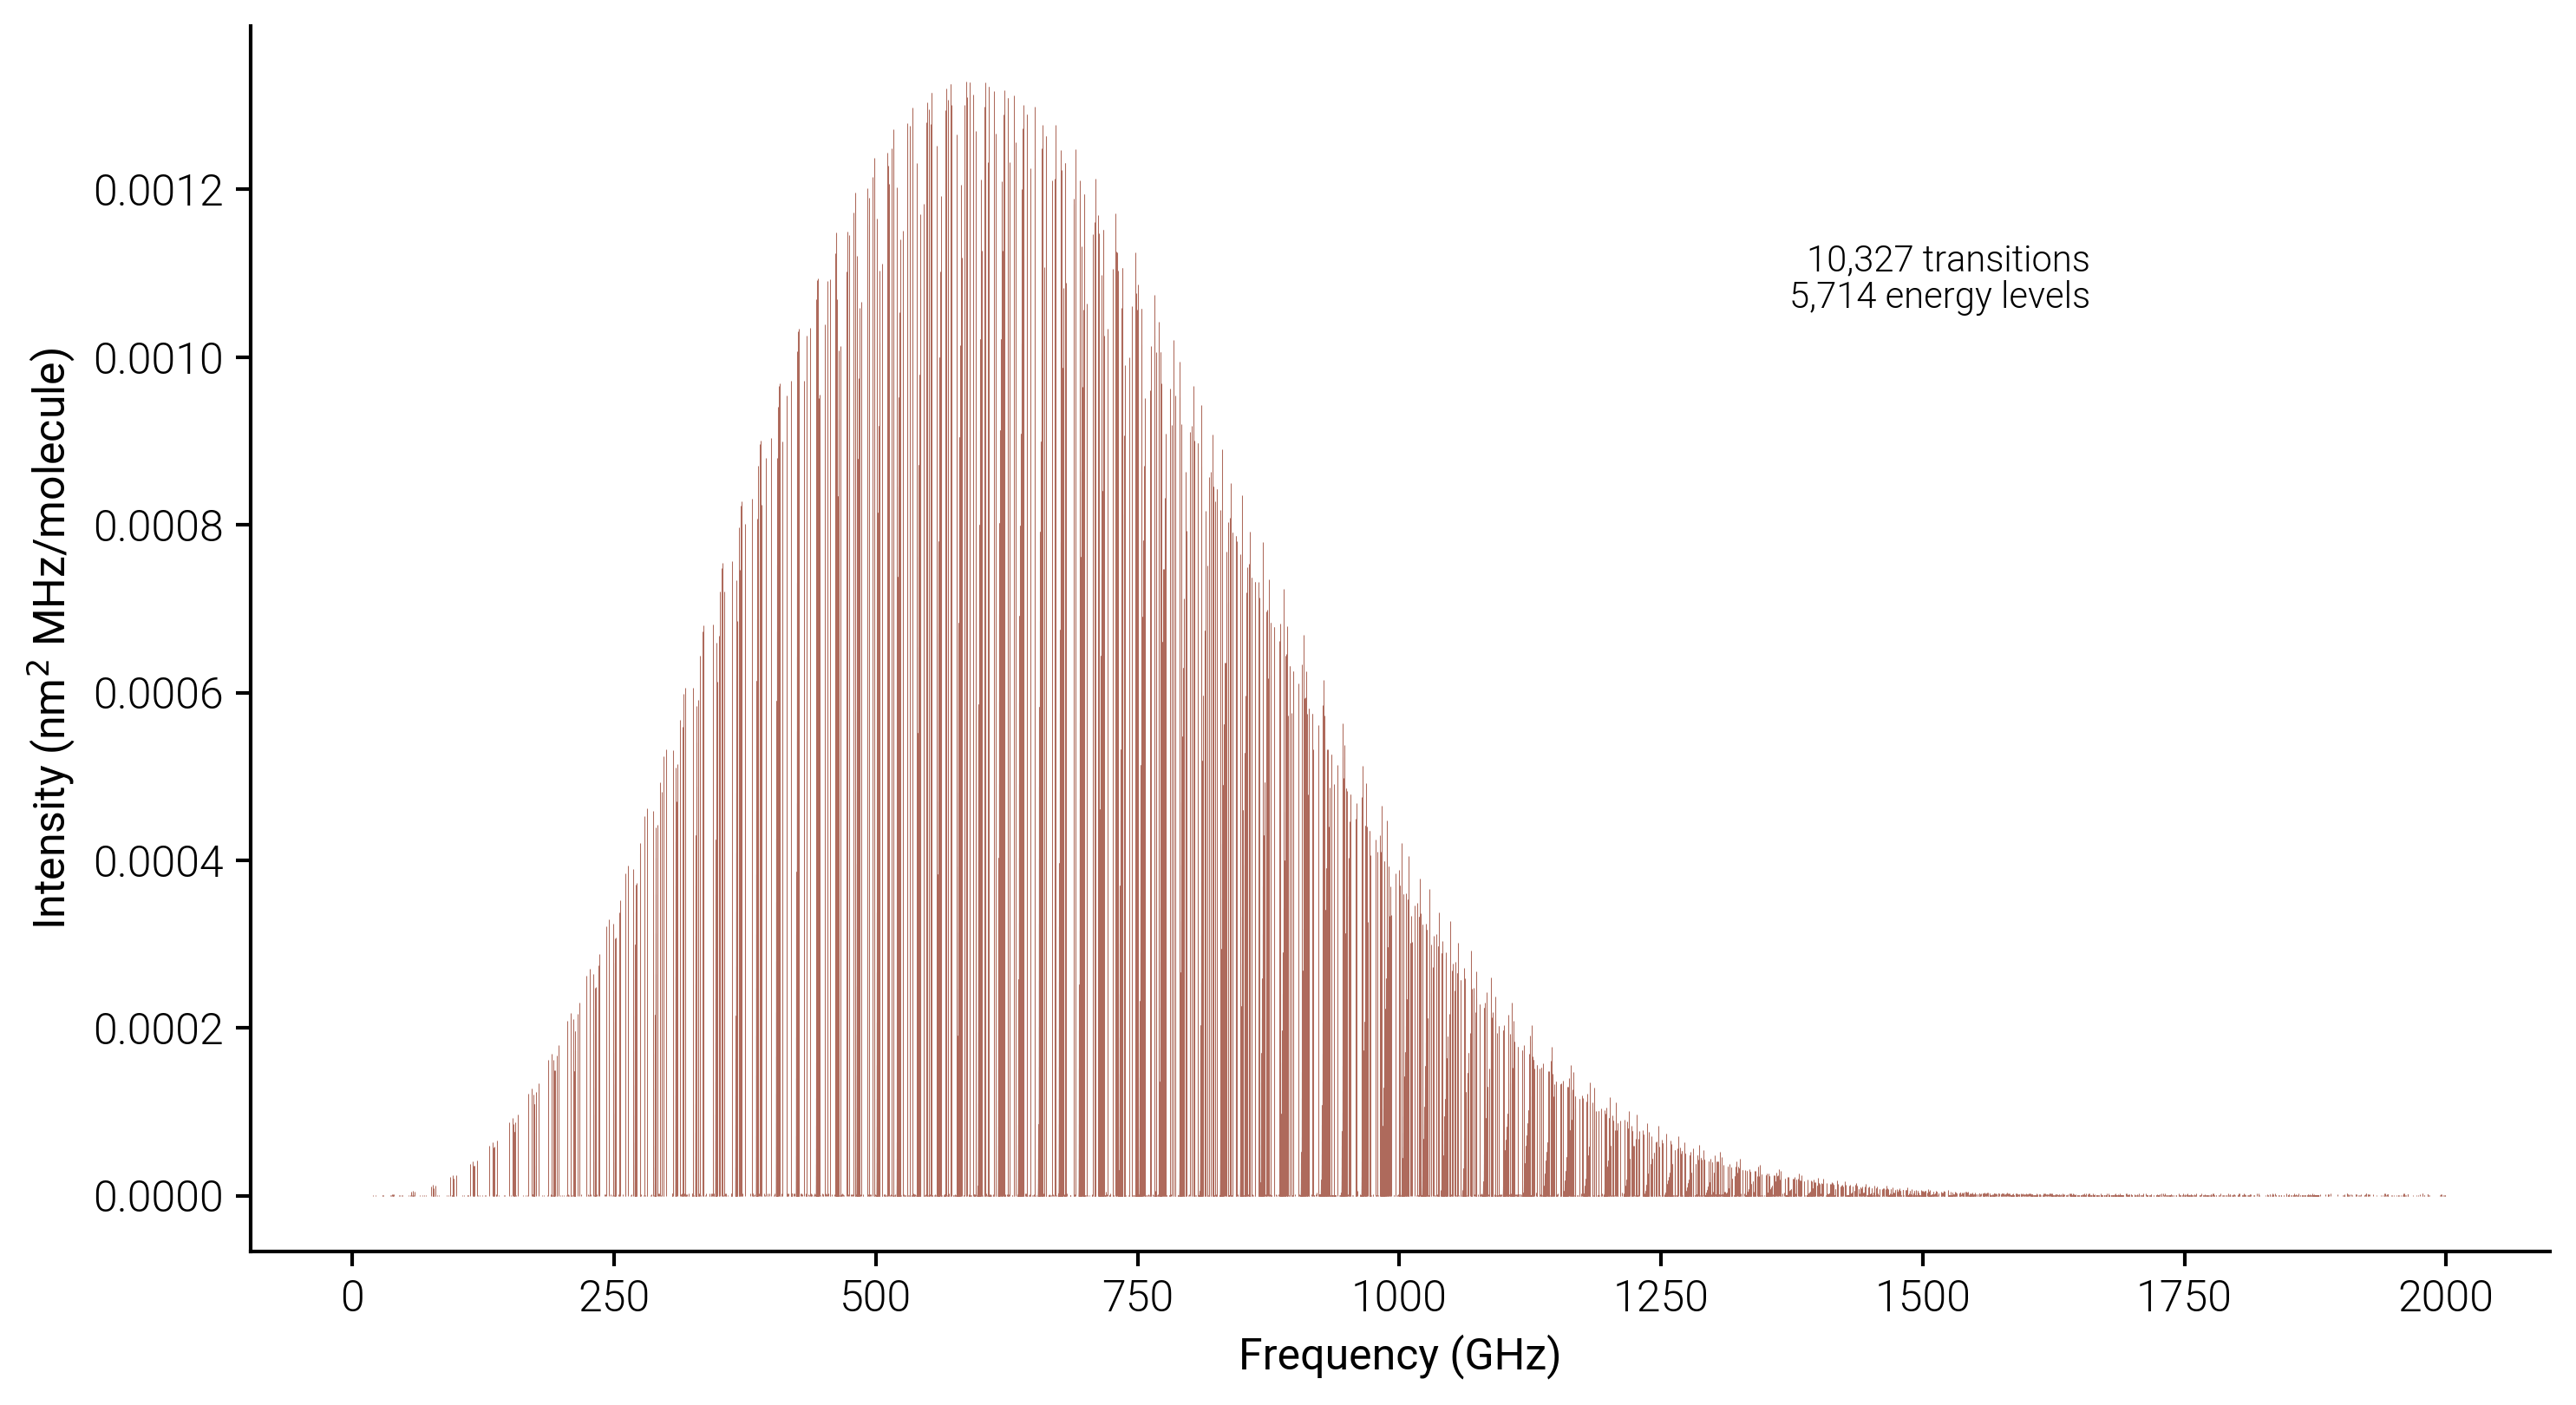

In [87]:
fig, ax = plt.subplots(figsize=(10, 5.5))

ax.vlines(acet["Position"] / 1e3, 0., acet["Intensity"], lw=0.25, color="#ae6a5c")
ax.text(0.8, 0.8, f"{len(acet):,} transitions", transform=ax.transAxes, horizontalalignment="right")
ax.text(0.8, 0.77, f"{len(levels):,} energy levels", transform=ax.transAxes, horizontalalignment="right")
ax.set(ylabel="Intensity (nm$^2$ MHz/molecule)", xlabel="Frequency (GHz)")
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
fig.savefig("../assets/acetaldehyde-300k.svg", dpi=150, transparent=True)